In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## neural networks

FEED FORWARD (predict perceptron output 'a')  
  
$z = \sum\limits_{i=1}^{n} {w_i}{x_i} + b$  
$z$ is known as the weighted input  
$a = f(z)$  
$a$ is known as the activation  
$z = \hat{y}$ (predicted output) for single perceptron with no activation function

BACK PROPAGATION (update weights and bias to minimize cost/loss/total error) 
  
$e = t - a$ (known training label - perceptron output) or $e= y - \hat{y}$ (desired output - predicted output) for single perceptron with no activation function
  
$C = {1 \over 2} \sum\limits_{i=1}^{n} e^2$
  
need the slope (derivative of C with respect to w) of the cost function in order to find the minimize the cost (use chain rule)
  
$\frac{\partial C}{\partial w} = \frac{\partial C}{\partial e} \frac{\partial e}{\partial {a}} \frac{\partial a}{\partial z} \frac{\partial z}{\partial w}$
  
$\frac{\partial C}{\partial e} = e$

$\frac{\partial e}{\partial a} = -1$

$\frac{\partial a}{\partial z} = f'(z)$

$\frac{\partial z}{\partial w} = x$

$\frac{\partial C}{\partial w} = -e \cdot f'(z) \cdot x$
  
Gradient Descent learning requires that any change in a particular weight be proportional to the negative of the derivative of the cost    
(ie. move the weight in the negative direction of the gradient to minimize error)
    
$\Delta w = -\eta \cdot \frac{\partial C}{\partial w} = \eta \cdot e \cdot f'(z) \cdot x$
  
$\eta = $ learning rate or step size  
    
$f'(z) = 1$ if $a = z$ (ie. no activation function)

## single perceptron model - linear regression

-Single output neuron, no hidden layers  
-Single layer network (input layer is not counted because there no computation done, inputs are fed directly to the output nodes via a series of weights)  
-Neural network without an activation function is essentially just a linear regression model

In [2]:
"""line in 2d
y = 2x + 0.5
y = wx + b
"""

# training set
x = [2.0, 4.0]
y = [4.5, 8.5]

# initialize weight (w) and bias (b or theta)
# weight typically small random number (.01 * randn)
# bias typically zero or small number
weight = 0.01
bias = 0

# eta - learning rate or step rate
eta = 0.1

# each iteration through the training set is an epoch
epoch = 150

for _ in range(epoch):
    
    cost = 0
    
    # iterate through each input observation
    for input_, output in zip(x, y):
        
        prediction = (input_ * weight) + bias
                  
        # delta rule / perceptron learning rule
        # delta rule uses gradient descent to minimize the error
        # change in weight = eta * e * input
        # new weight = old weight + change in weight
        e = output - prediction
        weight += (eta * e * input_)
        
        # bias is updated similarily
        # except that there is no actual input or the input is 1
        # eg (w * x) + (b * 1) - inputs are w and 1
        # change in bias = eta * e * 1
        bias += (eta * e)
        
        # error/cost/loss fuction = 1/2 * ([sum((output - pred)**2)] for i=1 to n inputs)
        # 1/2 to simplify the functions derivative
        # squared so that not negative and penalize large deltas
        cost += e ** 2
        
        print(f'y: {prediction:5.2f}', end='    ')
        
    print(f'Weight: {weight:0.2f}', end='    ')
    print(f'Bias: {bias:0.2f}', end='    ')
    print(f'Cost: {0.5 * cost:0.5f}')

y:  0.02    y:  4.07    Weight: 2.68    Bias: 0.89    Cost: 19.83879
y:  6.25    y: 10.03    Weight: 1.72    Bias: 0.56    Cost: 2.69166
y:  4.00    y:  7.88    Weight: 2.06    Bias: 0.68    Cost: 0.31716
y:  4.80    y:  8.66    Weight: 1.94    Bias: 0.63    Cost: 0.05871
y:  4.51    y:  8.38    Weight: 1.99    Bias: 0.64    Cost: 0.00715
y:  4.61    y:  8.48    Weight: 1.97    Bias: 0.63    Cost: 0.00640
y:  4.57    y:  8.45    Weight: 1.98    Bias: 0.63    Cost: 0.00391
y:  4.58    y:  8.46    Weight: 1.98    Bias: 0.62    Cost: 0.00414
y:  4.58    y:  8.46    Weight: 1.98    Bias: 0.62    Cost: 0.00370
y:  4.57    y:  8.46    Weight: 1.98    Bias: 0.62    Cost: 0.00355
y:  4.57    y:  8.46    Weight: 1.98    Bias: 0.61    Cost: 0.00332
y:  4.57    y:  8.46    Weight: 1.98    Bias: 0.61    Cost: 0.00314
y:  4.57    y:  8.46    Weight: 1.98    Bias: 0.61    Cost: 0.00295
y:  4.57    y:  8.47    Weight: 1.98    Bias: 0.60    Cost: 0.00278
y:  4.56    y:  8.47    Weight: 1.98    Bias: 0

In [3]:
"""plane in 3d
2x - 8y + 5z = 18
y = w1*x1 + w2*x2 + b*x0
y = 0.25*x1 + 0.625*x2 - 2.25
"""

# [x0, x1, x2]
# x0 is a dummy variable for the bias term (x0=1)
x = np.array([[1, 1, 0],
              [1, 3, 4],
              [1, 0, 2]])

y = np.array([-2,
               1,
              -1])

# [b, w1, w2]
weight = np.array([0, 0.01, 0.01])

eta = 0.1

epoch = 250

for _ in range(epoch):
    
    cost = 0

    for input_, output in zip(x, y):
        
        #prediction = = w1*x1 + w2*x2 + b*x0
        prediction = np.dot(input_, weight)
                  
        e = output - prediction
        weight += eta * e * input_
        
        cost += e ** 2
        
        print(f'y: {prediction:5.2f}', end='    ')
        
    with np.printoptions(precision=3):
        print(f'Weight: {weight}', end='    ')
    print(f'Cost: {0.5 * cost:0.5f}')

y:  0.01    y: -0.73    y:  1.38    Weight: [-0.266  0.329  0.228]    Cost: 6.35468
y:  0.06    y:  0.81    y:  0.16    Weight: [-0.568  0.181  0.073]    Cost: 2.81704
y: -0.39    y: -0.38    y:  0.66    Weight: [-0.758  0.433  0.293]    Cost: 3.62207
y: -0.32    y:  1.04    y: -0.38    Weight: [-0.992  0.252  0.151]    Cost: 1.59788
y: -0.74    y: -0.13    y:  0.21    Weight: [-1.125  0.466  0.364]    Cost: 2.16284
y: -0.66    y:  1.19    y: -0.70    Weight: [-1.308  0.274  0.228]    Cost: 0.96178
y: -1.03    y:  0.04    y: -0.08    Weight: [-1.4    0.466  0.429]    Cost: 1.34666
y: -0.93    y:  1.29    y: -0.91    Weight: [-1.544  0.273  0.296]    Cost: 0.61331
y: -1.27    y:  0.17    y: -0.28    Weight: [-1.606  0.451  0.484]    Cost: 0.87491
y: -1.16    y:  1.34    y: -1.03    Weight: [-1.722  0.263  0.353]    Cost: 0.41601
y: -1.46    y:  0.26    y: -0.41    Weight: [-1.762  0.43   0.529]    Cost: 0.59502
y: -1.33    y:  1.38    y: -1.11    Weight: [-1.855  0.25   0.4  ]    Cost: 

y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.249  0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.251  0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001
y: -2.00    y:  1.00    y: -1.00    Weight: [-2.25   0.25   0.625]    Cost: 0.00001


## single perceptron model - linear classification

y:  0.00    y:  1.00    y:  1.00    y:  1.00    Weight: [ 0.   -0.09 -0.09]    Cost: 1.00000
y:  0.00    y:  1.00    y:  1.00    y:  0.00    Weight: [ 0.1  -0.09 -0.09]    Cost: 0.50000
y:  1.00    y:  1.00    y:  1.00    y:  0.00    Weight: [ 0.1  -0.09 -0.09]    Cost: 0.00000
y:  1.00    y:  1.00    y:  1.00    y:  0.00    Weight: [ 0.1  -0.09 -0.09]    Cost: 0.00000
y:  1.00    y:  1.00    y:  1.00    y:  0.00    Weight: [ 0.1  -0.09 -0.09]    Cost: 0.00000

z = -0.09*x1 + -0.09*x2 + 0.10
y = f(z) where f(z) = binary step


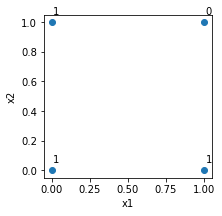

In [4]:
"""NAND logic gate, small linear separable dataset"""

# activation function
def binary_step(x):
    if x > 0:
        return 1
    else:
        return 0

# [x0, x1, x2]
x = np.array([[1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

y = np.array([1,
              1,
              1,
              0])

# plot training set data    
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x[:,1], x[:,2])
ax.set_xlabel('x1')
ax.set_ylabel('x2')

for i, label in enumerate(y):
    ax.annotate(label, (x[i,1]+0.01, x[i,2]+0.05))

# [b, w1, w2]
weight = np.array([0, 0.01, 0.01])

eta = 0.1
epoch = 5

for _ in range(epoch):
    
    cost = 0

    for input_, output in zip(x, y):
        
        # z = w1*x1 + w2*x2 + b*x0
        z = np.dot(input_, weight)
        
        # apply binary step activation function
        prediction = binary_step(z)
            
        e = output - prediction
        weight += eta * e * input_
        
        cost += e ** 2
        
        print(f'y: {prediction:5.2f}', end='    ')
        
    with np.printoptions(precision=3):
        print(f'Weight: {weight}', end='    ')
    print(f'Cost: {0.5 * cost:0.5f}')
    
print(f'\nz = {weight[1]:0.2f}*x1 + {weight[2]:0.2f}*x2 + {weight[0]:0.2f}')
print('y = f(z) where f(z) = binary step')

## neural network with hidden layer

**Example: 2 input nodes, 3 hidden layer nodes, 1 output node**  
(4 input observations, eg. logic gate)

Input matrix has observations in rows, size is (# observations x # inputs)  
Weights matrix size is (# neurons in preceeding layer x # neurons in subject layer)  
Bias vector size is (1 x # neurons in subject layer)  

$X = 
\begin{bmatrix}
X_1^1 & X_2^1\\
X_1^2 & X_2^2\\
X_1^3 & X_2^3\\
X_1^4 & X_2^4
\end{bmatrix}_{4\times2}$

$W_h = 
\begin{bmatrix}
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{bmatrix}_{2\times3}$

$b_h = 
\begin{bmatrix}
b_1 & b_2 & b_3
\end{bmatrix}_{1\times3}$

**Hidden Layer - Weighted Sum Matrix Z:**

$Z_h = X \cdot W_h + b_h$ (if observations in rows)  
$Z_h = W^T_h \cdot X + b_h$ (if observations in columns)

matrix multiplication size rule $(m \times n) \cdot (n \times k) = (m \times k)$  
number of columns in first matrix must equal number of rows in second matrix  
$Z_h = (4 \times 2) \cdot (2 \times 3) = (4 \times 3)$

$Z_h = X \cdot W_h + b_h = 
\begin{bmatrix}
X_1^1w_{11} + X_2^1w_{21} + b_1 & X_1^1w_{12} + X_2^1w_{22} + b_2 & X_1^1w_{13} + X_2^1w_{23} + b_3\\
\cdots & \cdots & \cdots\\
\cdots & \cdots & \cdots\\
X_1^4w_{11} + X_2^4w_{21} + b_1 & X_1^4w_{12} + X_2^4w_{22} + b_2 & X_1^4w_{13} + X_2^4w_{23} + b_3
\end{bmatrix}_{4\times3}$  

**Hidden Layer - Activation Matrix a:**  
$a_h = \sigma(Z_h)$  
where sigma is an activation function aplied to each matrix element  
$a_h$ is the same size as $Z_h$

**Output layer:**  
$Z_o = a_h \cdot W_o + b_o$  
$Z_o = (4\times3) \cdot (3\times1) + (1) = (4\times1)$  
$a_o = \sigma(Z_o)$    

**Alternative Matrix Setup:**  
$X_0$ dummy input variable that is equal to 1 can be added to input matrix and bias vector can be combined with weight matrix  
$X_0^1 b_1 = b_1$

$X = 
\begin{bmatrix}
X_0^1 & X_1^1 & X_2^1\\
X_0^2 & X_1^2 & X_2^2\\
X_0^3 & X_1^3 & X_2^3\\
X_0^4 & X_1^4 & X_2^4
\end{bmatrix}_{4\times3}$

$W_h = 
\begin{bmatrix}
b_1 & b_2 & b_3\\
w_{11} & w_{12} & w_{13}\\
w_{21} & w_{22} & w_{23}
\end{bmatrix}_{3\times3}$

$Z_h = X \cdot W_h = 
\begin{bmatrix}
b_1 + X_1^1w_{11} + X_2^1w_{21} & b_2 + X_1^1w_{12} + X_2^1w_{22} & b_3 + X_1^1w_{13} + X_2^1w_{23}\\
\cdots & \cdots & \cdots\\
\cdots & \cdots & \cdots\\
b_1 + X_1^4w_{11} + X_2^4w_{21} & b_2 + X_1^4w_{12} + X_2^4w_{22} & b_3 + X_1^4w_{13} + X_2^4w_{23}
\end{bmatrix}_{4\times3}$

**Back Propagation:**  

$e= y - {a_o}$ (desired output - predicted output)
  
$C = {1 \over 2} \sum\limits_{i=1}^{n} e^2$

Output weights:  

$\frac{\partial C}{\partial w_o} = \frac{\partial C}{\partial e} \frac{\partial e}{\partial a_o} \frac{\partial a_o}{\partial z_o} \frac{\partial z_o}{\partial w_o}$
  
$\frac{\partial C}{\partial e} = e$

$\frac{\partial e}{\partial a_o} = -1$

$\frac{\partial a_o}{\partial z_o} = \sigma'(z_o)$

$\frac{\partial z_o}{\partial w_o} = a_h$

$\frac{\partial C}{\partial w_o} = -e \cdot \sigma'(z_o) \cdot a_h$

$\Delta w_o = -\eta \cdot \frac{\partial C}{\partial w_o} = \eta \cdot e \cdot \sigma'(z_o) \cdot a_h$

Rearrage for matrix multiplication:  
$\Delta w_o = \eta \cdot (a_h^T \cdot (e \circ \sigma'(z_o)))$  

$\Delta w_o = (1) \cdot (3\times4) \cdot ((4\times1) \circ (4\times1)) = (3\times1)$

$\circ - hadamard product$

Output bias:  
$\Delta b_o = \eta \cdot (J_{(1\times4)} \cdot (e \circ \sigma'(z_o))) = \eta \cdot \sum\limits_{i=1}^{4}(e \circ \sigma'(z_o))$   
where $J_{(1\times4)}$ is a vector of ones   
$\Delta b_o = (1) \cdot (1\times4) \cdot ((4\times1) \circ (4\times1)) = (1)$  

Hidden weights: 

$\frac{\partial C}{\partial w_h} = \frac{\partial C}{\partial e} \frac{\partial e}{\partial a_o} \frac{\partial a_o}{\partial z_o} \frac{\partial z_o}{\partial a_h} \frac{\partial a_h}{\partial z_h} \frac{\partial z_h}{\partial w_h}$  

$\frac{\partial z_o}{\partial a_h} = w_o$

$\frac{\partial a_h}{\partial z_h} = \sigma'(z_h)$

$\frac{\partial z_h}{\partial w_h} = X$

$\frac{\partial C}{\partial w_h} = -e \cdot \sigma'(z_o) \cdot w_o \cdot \sigma'(z_h) \cdot X$

$\Delta w_h = -\eta \cdot \frac{\partial C}{\partial w_h} = \eta \cdot e \cdot \sigma'(z_o) \cdot w_o \cdot \sigma'(z_h) \cdot X$

The Four Fundamental Equations:

http://neuralnetworksanddeeplearning.com/chap2.html  

$\delta_o = \frac{\partial C}{\partial z_o} = \frac{\partial C}{\partial e} \frac{\partial e}{\partial a_o} \frac{\partial a_o}{\partial z_o} = -e \circ \sigma'(z_o)$  

$\delta_L = \frac{\partial C}{\partial z_L} = (\delta_{L+1} \cdot w_{L+1}^T) \circ \sigma'(z_L)$  

$\frac{\partial C}{\partial w_L} = a_{L-1}^T \cdot \delta_L$  

$\frac{\partial C}{\partial b_L} = J_{1 \times n} \cdot \delta_{L} = \sum\limits_{i=1}^{n} \delta_{L}$  

where $J$ is a vector of ones and n is the number of oberservations or equivalently the summation of the columns in the delta matrix (axis 0)

ah (4, 3)
ao (4, 1)
e (4, 1)
wo (3, 1)
bo (1,)
wh (2, 3)
bh (3,)

 ao
 [[0.01347139]
 [0.98146565]
 [0.98448358]
 [0.0172591 ]]


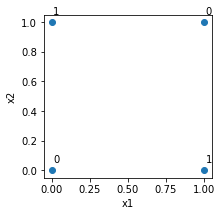

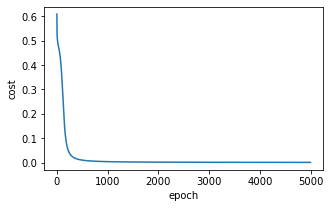

In [5]:
"""non linear classification - 2 layer neural network
2 input nodes
3 hidden layer nodes
1 output node (binary classification)
XOR logic gate
"""

# activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))
    
# XOR logic gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0,
              1,
              1,
              0]).reshape(-1,1)

# plot training set data    
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(X[:,0], X[:,1])
ax.set_xlabel('x1')
ax.set_ylabel('x2')

for i, label in enumerate(y.flatten()):
    ax.annotate(label, (X[i,0]+0.01, X[i,1]+0.05))

# intialize weights and bias for hidden layer
wh = np.random.randn(2,3)
bh = np.zeros(3)

# initialize weights and bias for output layer
wo = np.random.randn(3,1)
bo = np.zeros(1)

eta = 1
epoch = 5000
cost = []

for _ in range(epoch):

    # feed forward
    zh = np.dot(X, wh) + bh
    ah = sigmoid(zh)
    
    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

    # back propagation
    e = y - ao
    C = 0.5 * np.sum(e ** 2)
    cost.append(C)
    
    delta_o = -e * sigmoid_der(zo)
    delta_h = np.dot(delta_o, wo.T) * sigmoid_der(zh)
    
    dC_dwo = np.dot(ah.T, delta_o)
    dC_dbo = np.sum(delta_o, axis=0)
    dC_dwh = np.dot(X.T, delta_h)
    dC_dbh = np.sum(delta_h, axis=0)
    
    wo += -eta * dC_dwo
    bo += -eta * dC_dbo
    
    wh += -eta * dC_dwh
    bh += -eta * dC_dbh

print('ah', ah.shape)
print('ao', ao.shape)
print('e', e.shape)
print('wo', wo.shape)
print('bo', bo.shape)
print('wh', wh.shape)
print('bh', bh.shape)

print('\n ao\n', ao)

fig, ax = plt.subplots(figsize=(5,3))
ax.plot(cost)
ax.set_xlabel('epoch')
ax.set_ylabel('cost');


ah (100, 3)
ao (100, 1)
e (100, 1)
wo (3, 1)
bo (1,)
wh (2, 3)
bh (3,)


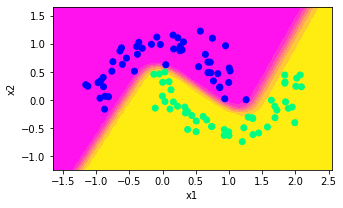

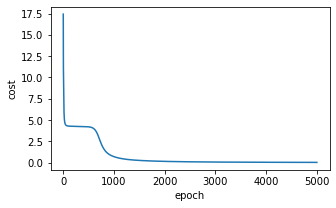

In [6]:
"""non linear classification - 2 layer neural network
2 input nodes
3 hidden layer nodes
1 output node (binary classification)
"""

# activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))
    
# get dataset from sklearn module and plot
np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.15)
y = y.reshape(-1,1)

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(X[:,0], X[:,1], c=y[:,0], cmap='winter', zorder=2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')

# intialize weights and bias for hidden layer
wh = np.random.randn(2,3)
bh = np.zeros(3)

# initialize weights and bias for output layer
wo = np.random.randn(3,1)
bo = np.zeros(1)

eta = 0.1
epoch = 5000
cost = []

for _ in range(epoch):

    # feed forward
    zh = np.dot(X, wh) + bh
    ah = sigmoid(zh)
    
    zo = np.dot(ah, wo) + bo
    ao = sigmoid(zo)

    # back propagation
    e = y - ao
    C = 0.5 * np.sum(e ** 2)
    cost.append(C)
    
    delta_o = -e * sigmoid_der(zo)
    delta_h = np.dot(delta_o, wo.T) * sigmoid_der(zh)
    
    dC_dwo = np.dot(ah.T, delta_o)
    dC_dbo = np.sum(delta_o, axis=0)
    dC_dwh = np.dot(X.T, delta_h)
    dC_dbh = np.sum(delta_h, axis=0)
    
    wo += -eta * dC_dwo
    bo += -eta * dC_dbo
    
    wh += -eta * dC_dwh
    bh += -eta * dC_dbh

print('ah', ah.shape)
print('ao', ao.shape)
print('e', e.shape)
print('wo', wo.shape)
print('bo', bo.shape)
print('wh', wh.shape)
print('bh', bh.shape)

fig1, ax1 = plt.subplots(figsize=(5,3))
ax1.plot(cost)
ax1.set_xlabel('epoch')
ax1.set_ylabel('cost')

# plot the decision boundary
x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
X_grid = np.stack((xx1.flatten(), xx2.flatten()), axis=-1)

zh = np.dot(X_grid, wh) + bh
ah = sigmoid(zh)
zo = np.dot(ah, wo) + bo
ao = sigmoid(zo)
ao = ao.reshape(xx1.shape)

ax.contourf(xx1, xx2, ao, cmap='spring', zorder=1);